In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier

In [19]:
wine = datasets.load_wine()
# print the names of the features
print(wine.feature_names)
# print the label species(class_0, class_1, class_2)
print(wine.target_names)
# print the wine data (top 5 records)
print(wine.data[0:5])
# print the wine labels (0:Class_0, 1:Class_1, 2:Class_3)
print(wine.target)
# print data(feature)shape
print(wine.data.shape)
# print target(or label)shape
print(wine.target.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [66]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Accuracy: 0.6851851851851852
[[13  0  3]
 [ 1 17  8]
 [ 1  4  7]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.81      0.65      0.72        26
           2       0.39      0.58      0.47        12

    accuracy                           0.69        54
   macro avg       0.69      0.68      0.68        54
weighted avg       0.73      0.69      0.70        54

0.6994047619047619


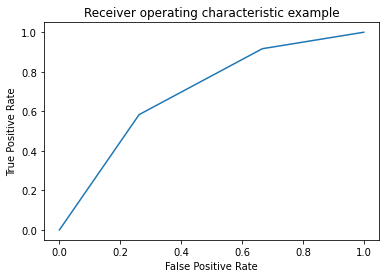

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

# Confusion Metrics
print(confusion_matrix(y_test,y_pred))

# Classification Report
print(classification_report(y_test,y_pred))

#AUC and ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
print(auc(fpr, tpr))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [68]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred),columns = wine.target_names, index = wine.target_names)
index = cm_df.index
index.name = "Actual"
columns=[('Predicted','class_0'),('Predicted','class_1'),('Predicted','class_2')]
cm_df.columns=pd.MultiIndex.from_tuples(columns)
cm_df

Predicted                
          class_0 class_1 class_2
Actual                           
class_0        13       0       3
class_1         1      17       8
class_2         1       4       7

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.81      0.65      0.72        26
           2       0.39      0.58      0.47        12

    accuracy                           0.69        54
   macro avg       0.69      0.68      0.68        54
weighted avg       0.73      0.69      0.70        54



In [73]:
pd.DataFrame(y_pred).value_counts()

1    21
2    18
0    15
dtype: int64

In [77]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.81      0.84        16\n           1       0.81      0.65      0.72        26\n           2       0.39      0.58      0.47        12\n\n    accuracy                           0.69        54\n   macro avg       0.69      0.68      0.68        54\nweighted avg       0.73      0.69      0.70        54\n'